In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [9]:
sess=tf.Session()
x_vals=np.linspace(0, 10, 100)
y_vals=x_vals + np.random.normal(0,1,100)

In [3]:
x_column=np.transpose(np.matrix(x_vals))
one_column=np.transpose(np.matrix(np.repeat(1, 100)))
A=np.column_stack((x_column, one_column))
b=np.transpose(np.matrix(y_vals))

In [4]:
A_tensor=tf.constant(A)
b_tensor=tf.constant(b)

In [16]:
tA_A=tf.matmul(tf.transpose(A_tensor), A_tensor)
L=tf.cholesky(tA_A)    ## How cholesky decompse the (2*2) matrix.
tA_b=tf.matmul(tf.transpose(A_tensor), b)
sol1=tf.matrix_solve(L, tA_b)    # what is matrix solve?
sol2=tf.matrix_solve(L, sol1)     # why we need solution 1.
solution_eval=sess.run(sol2)

In [17]:
slope=solution_eval[0][0]
intercept=solution_eval[1][0]
print(slope, intercept)

0.9807801465553987 -1.835598762473937


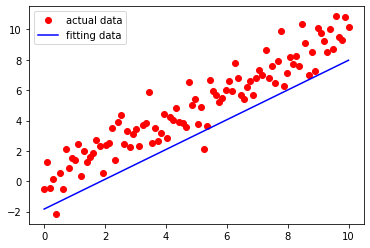

In [18]:
best_fit=[]
for i in x_vals:
    best_fit.append(slope*i + intercept)
    
plt.plot(x_vals, y_vals, 'ro', label='actual data')
plt.plot(x_vals, best_fit, 'b-', label='fitting data')
plt.legend(loc='upper left')
plt.show()